In [61]:
%load_ext autoreload
%autoreload 2

import numpy as np
import matplotlib as mlab
import matplotlib.pyplot as plt
import xarray as xr
import os as os
import matplotlib.gridspec as gridspec

# Local import 

from spectra.py_spectra import *

# Two levels that are used to create mean analysis

analysis_levels  = [10,25]

# Helper functions......

def add_fhour(ds):
    
    filename = ds.encoding["source"].split("_")
    
    init_time = int(filename[-2])
    fhour     = int(filename[-1][-5:-3])
        
    ds.coords['fhour'] = fhour
    ds.coords['init_time'] = init_time
    
    return ds
    

def open_mfdataset_list(data_dir, pattern):
    """
    Use xarray.open_mfdataset to read multiple netcdf files from a list.
    """
    filelist = os.path.join(data_dir,pattern)
    return xr.open_mfdataset(filelist, preprocess=add_fhour, combine='nested', concat_dim=['fhour'],parallel=True)



The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload



----------------------
get_spectraND called
----------------------

get_spectraND:  Reshaped array so that spectra averaged over outer dimension: 30


----------------------
get_spectraND called
----------------------

get_spectraND:  Reshaped array so that spectra averaged over outer dimension: 30


----------------------
get_spectraND called
----------------------

get_spectraND:  Reshaped array so that spectra averaged over outer dimension: 30


----------------------
get_spectraND called
----------------------

get_spectraND:  Reshaped array so that spectra averaged over outer dimension: 30


----------------------
get_spectraND called
----------------------

get_spectraND:  Reshaped array so that spectra averaged over outer dimension: 30


----------------------
get_spectraND called
----------------------

get_spectraND:  Reshaped array so that spectra averaged over outer dimension: 30



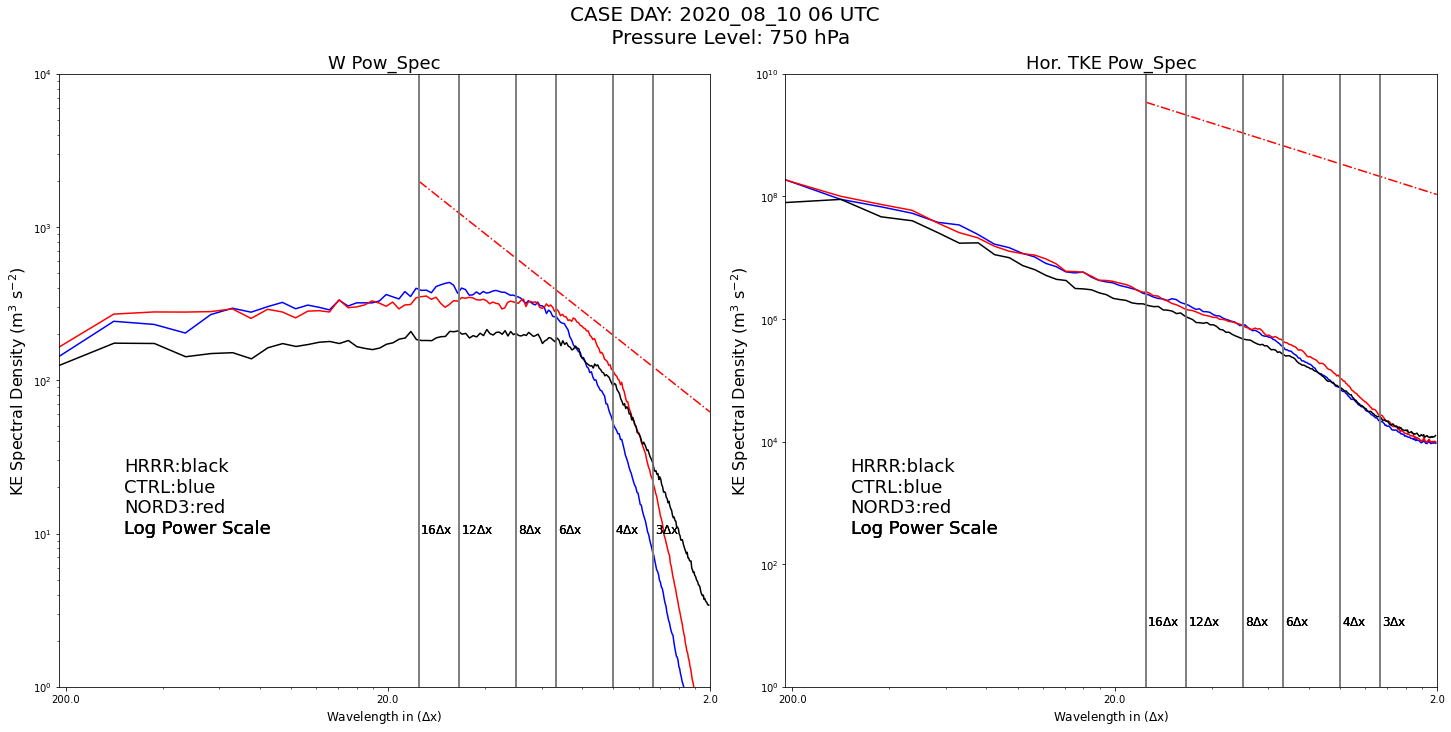


----------------------
get_spectraND called
----------------------

get_spectraND:  Reshaped array so that spectra averaged over outer dimension: 30


----------------------
get_spectraND called
----------------------

get_spectraND:  Reshaped array so that spectra averaged over outer dimension: 30


----------------------
get_spectraND called
----------------------

get_spectraND:  Reshaped array so that spectra averaged over outer dimension: 30


----------------------
get_spectraND called
----------------------

get_spectraND:  Reshaped array so that spectra averaged over outer dimension: 30


----------------------
get_spectraND called
----------------------

get_spectraND:  Reshaped array so that spectra averaged over outer dimension: 30


----------------------
get_spectraND called
----------------------

get_spectraND:  Reshaped array so that spectra averaged over outer dimension: 30



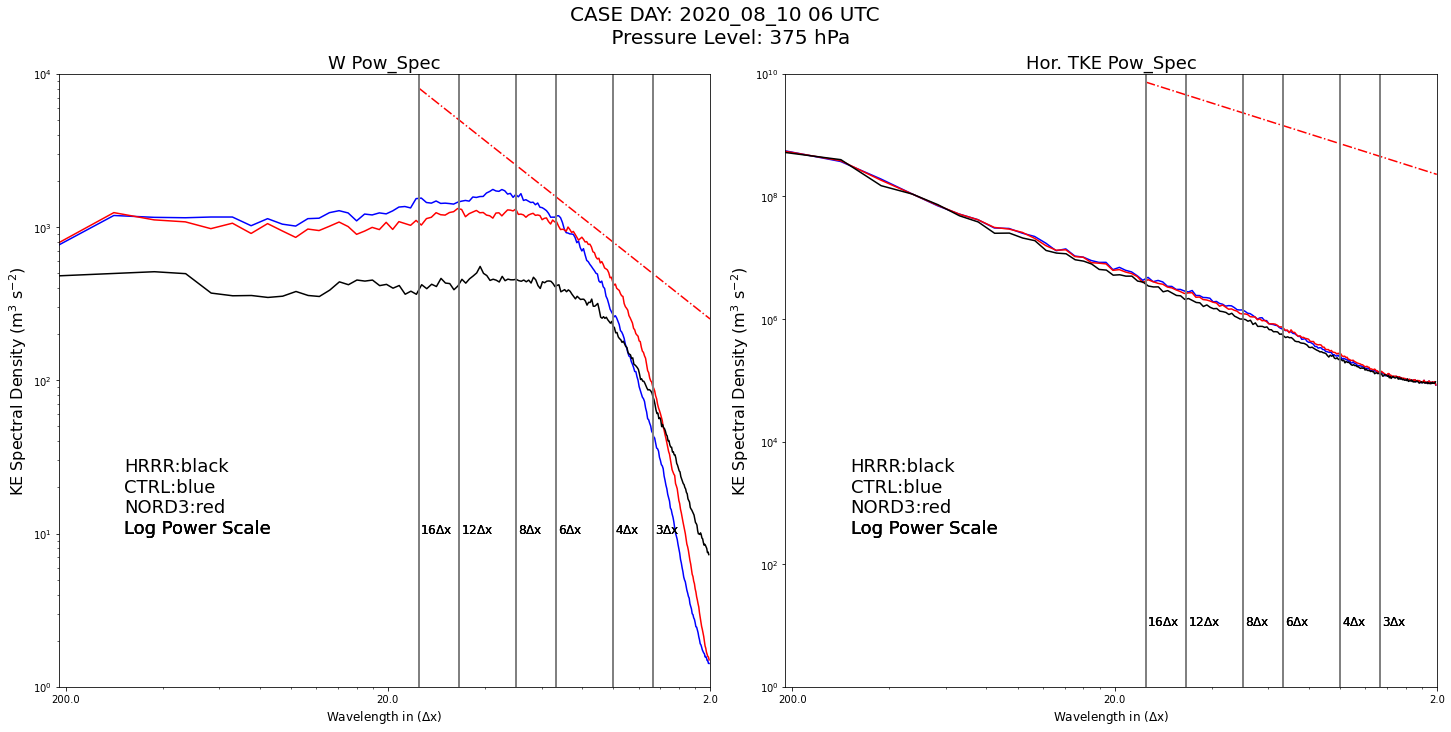

In [62]:
# List data sets

main_dir = "/Users/Louis.Wicker/CAM_Case_Studies"

day      = "2020081006"

#------------------------------------------------------------------------------------
# cut and past from below here
#

hrrr_dir  = str(os.path.join(main_dir, day, "hrrr"))
rrfs0_dir = str(os.path.join(main_dir, day, "ctrl"))
rrfs1_dir = str(os.path.join(main_dir, day, "nord3"))

# Open data sets

hrrr  = open_mfdataset_list(hrrr_dir , "region_*.nc")
rrfs0 = open_mfdataset_list(rrfs0_dir, "region_*.nc")
rrfs1 = open_mfdataset_list(rrfs1_dir, "region_*.nc")

# Loop over the analy_klevels to create multiple plots

for k in analysis_levels:
    
    # these five levels are averaged together
    
    klevels = [k-2, k-1, k, k+1, k+2]

    # Convert to numpy arrays, fill in zeros, compute horizontal TKE.

    hrrr_u = np.nan_to_num(hrrr.U.isel(nz=klevels).values).astype('float64')
    hrrr_v = np.nan_to_num(hrrr.V.isel(nz=klevels).values).astype('float64')
    hrrr_w = np.nan_to_num(hrrr.W.isel(nz=klevels).values).astype('float64')

    hrrr_tk2 = 0.5*(hrrr_u**2 + hrrr_v**2)


    rrfs0_u = np.nan_to_num(rrfs0.U.isel(nz=klevels).values).astype('float64')
    rrfs0_v = np.nan_to_num(rrfs0.V.isel(nz=klevels).values).astype('float64')
    rrfs0_w = np.nan_to_num(rrfs0.W.isel(nz=klevels).values).astype('float64')

    rrfs0_tk2 = 0.5*(rrfs0_u**2 + rrfs0_v**2)

    rrfs1_u = np.nan_to_num(rrfs1.U.isel(nz=klevels).values).astype('float64')
    rrfs1_v = np.nan_to_num(rrfs1.V.isel(nz=klevels).values).astype('float64')
    rrfs1_w = np.nan_to_num(rrfs1.W.isel(nz=klevels).values).astype('float64')

    rrfs1_tk2 = 0.5*(rrfs1_u**2 + rrfs1_v**2)

    # Compute spectra...

    fig = plt.figure(constrained_layout=True,figsize=(20,10))

    ylim = 1.0e4
    axis = 0
    func = get_spectra2D_POWSPEC

    gs = gridspec.GridSpec(1, 2, figure=fig)

    ax1 = fig.add_subplot(gs[0, 0])

    plot_spectra(rrfs0_w, func=func, axis=axis, ax=[ax1], legend='', PScolor='b', ylim=[1,ylim], LinsborgSlope=True)
    plot_spectra(rrfs1_w, func=func, axis=axis, ax=[ax1], legend='', PScolor='r', ylim=[1,ylim])
    plot_spectra(hrrr_w,  func=func, axis=axis, ax=[ax1], legend='HRRR:black\nCTRL:blue\nNORD3:red', ptitle = 'W Pow_Spec', ylim=[1,ylim])

    ax1 = fig.add_subplot(gs[0, 1])
    ylim = 1.0e10

    plot_spectra(rrfs0_tk2, func=func, axis=axis, ax=[ax1], legend='', PScolor='b', ylim=[1,ylim], LinsborgSlope=True)
    plot_spectra(rrfs1_tk2, func=func, axis=axis, ax=[ax1], legend='', PScolor='r', ylim=[1,ylim])
    plot_spectra(hrrr_tk2,  func=func, axis=axis, ax=[ax1], legend='HRRR:black\nCTRL:blue\nNORD3:red', ptitle = 'Hor. TKE Pow_Spec', ylim=[1,ylim])

    plt.suptitle("CASE DAY: %s_%s_%s %s UTC \n Pressure Level: %d hPa" % (day[0:4],day[4:6],day[6:8],day[8:10],hrrr.pres[k]/100), fontsize=20)

    plt.savefig("%s/spectra_%3.3d_hPa.pdf" % (os.path.join(main_dir, day), hrrr.pres[k]/100),bbox_inches='tight')

    plt.show()


----------------------
get_spectraND called
----------------------

get_spectraND:  Reshaped array so that spectra averaged over outer dimension: 30


----------------------
get_spectraND called
----------------------

get_spectraND:  Reshaped array so that spectra averaged over outer dimension: 30


----------------------
get_spectraND called
----------------------

get_spectraND:  Reshaped array so that spectra averaged over outer dimension: 30


----------------------
get_spectraND called
----------------------

get_spectraND:  Reshaped array so that spectra averaged over outer dimension: 30


----------------------
get_spectraND called
----------------------

get_spectraND:  Reshaped array so that spectra averaged over outer dimension: 30


----------------------
get_spectraND called
----------------------

get_spectraND:  Reshaped array so that spectra averaged over outer dimension: 30



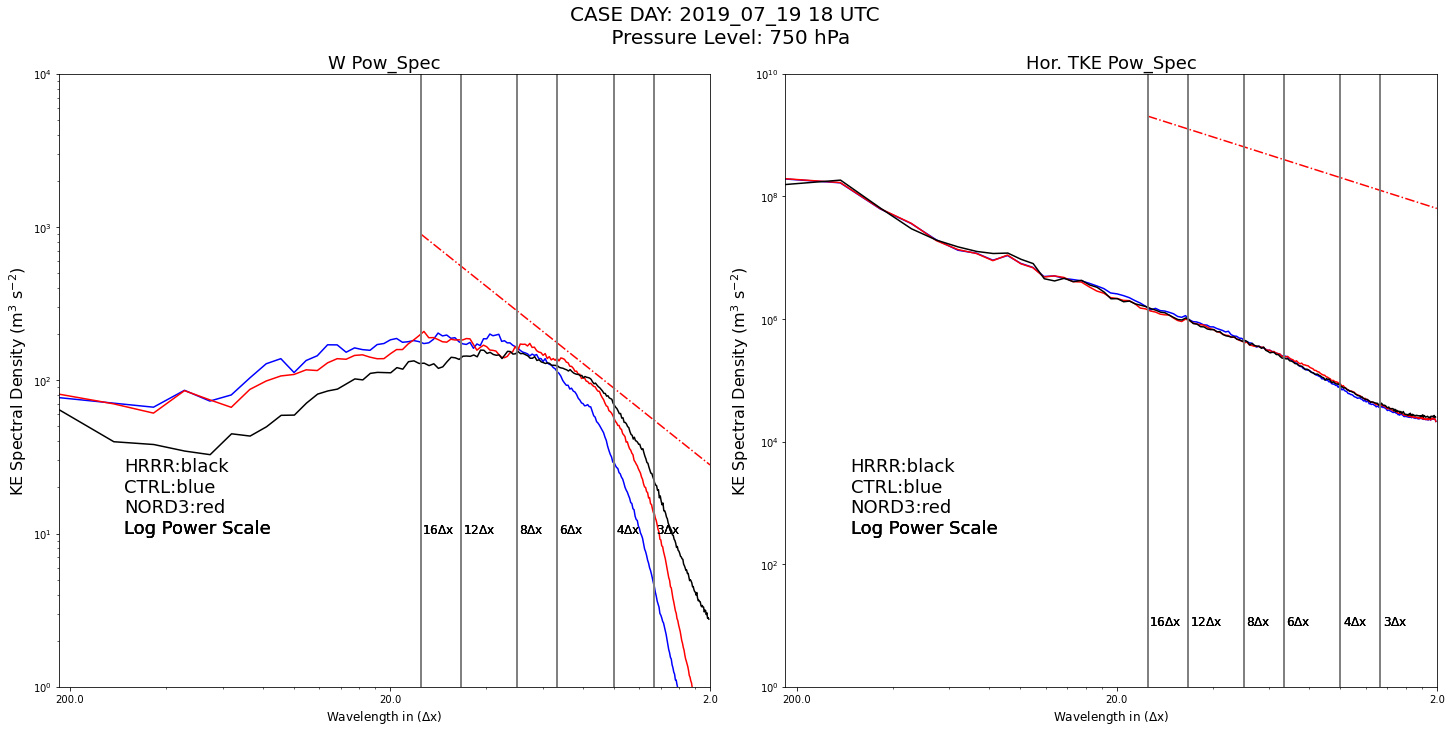


----------------------
get_spectraND called
----------------------

get_spectraND:  Reshaped array so that spectra averaged over outer dimension: 30


----------------------
get_spectraND called
----------------------

get_spectraND:  Reshaped array so that spectra averaged over outer dimension: 30


----------------------
get_spectraND called
----------------------

get_spectraND:  Reshaped array so that spectra averaged over outer dimension: 30


----------------------
get_spectraND called
----------------------

get_spectraND:  Reshaped array so that spectra averaged over outer dimension: 30


----------------------
get_spectraND called
----------------------

get_spectraND:  Reshaped array so that spectra averaged over outer dimension: 30


----------------------
get_spectraND called
----------------------

get_spectraND:  Reshaped array so that spectra averaged over outer dimension: 30



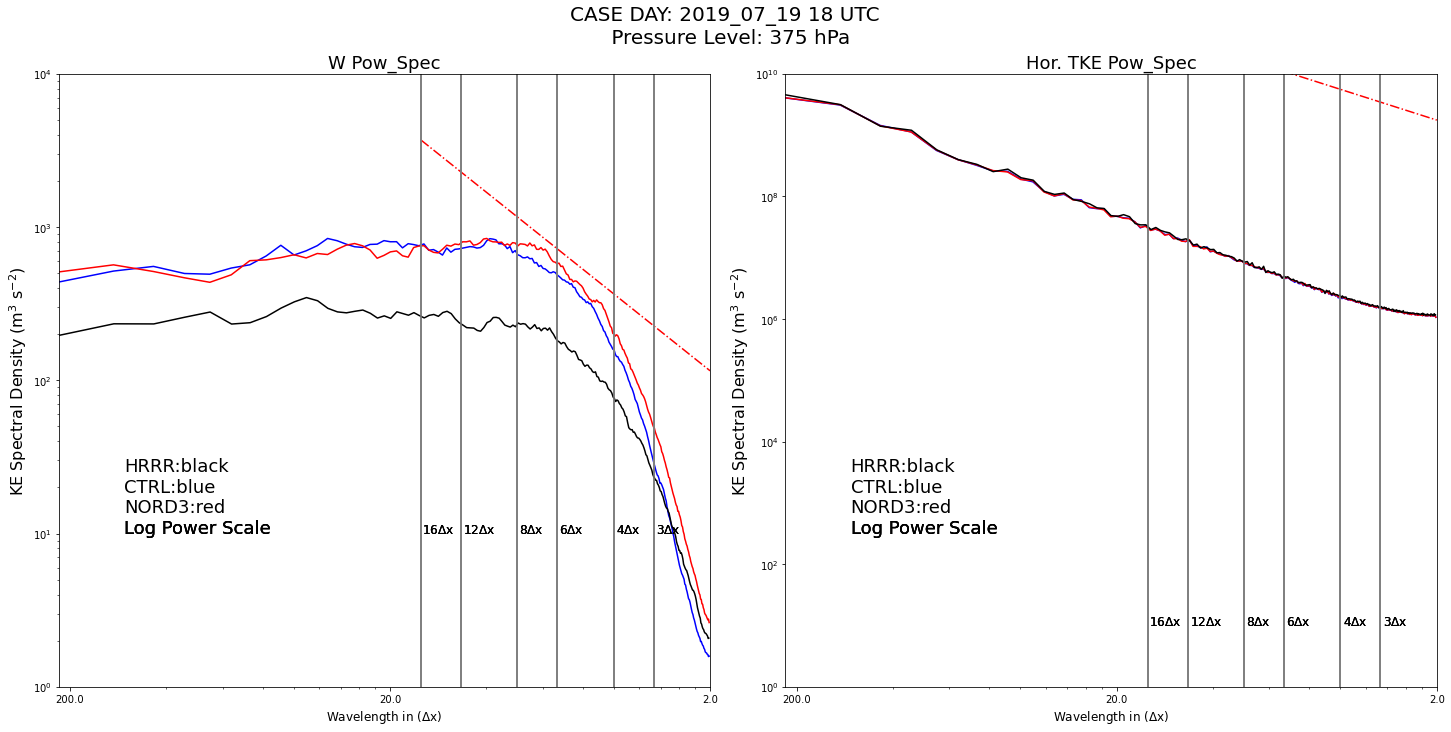

In [63]:
# List data sets

main_dir = "/Users/Louis.Wicker/CAM_Case_Studies"

day      = "2019071918"

#------------------------------------------------------------------------------------
# cut and past from below here
#

hrrr_dir  = str(os.path.join(main_dir, day, "hrrr"))
rrfs0_dir = str(os.path.join(main_dir, day, "ctrl"))
rrfs1_dir = str(os.path.join(main_dir, day, "nord3"))

# Open data sets

hrrr  = open_mfdataset_list(hrrr_dir , "region_*.nc")
rrfs0 = open_mfdataset_list(rrfs0_dir, "region_*.nc")
rrfs1 = open_mfdataset_list(rrfs1_dir, "region_*.nc")

# Loop over the analy_klevels to create multiple plots

for k in analysis_levels:
    
    # these five levels are averaged together
    
    klevels = [k-2, k-1, k, k+1, k+2]

    # Convert to numpy arrays, fill in zeros, compute horizontal TKE.

    hrrr_u = np.nan_to_num(hrrr.U.isel(nz=klevels).values).astype('float64')
    hrrr_v = np.nan_to_num(hrrr.V.isel(nz=klevels).values).astype('float64')
    hrrr_w = np.nan_to_num(hrrr.W.isel(nz=klevels).values).astype('float64')

    hrrr_tk2 = 0.5*(hrrr_u**2 + hrrr_v**2)


    rrfs0_u = np.nan_to_num(rrfs0.U.isel(nz=klevels).values).astype('float64')
    rrfs0_v = np.nan_to_num(rrfs0.V.isel(nz=klevels).values).astype('float64')
    rrfs0_w = np.nan_to_num(rrfs0.W.isel(nz=klevels).values).astype('float64')

    rrfs0_tk2 = 0.5*(rrfs0_u**2 + rrfs0_v**2)

    rrfs1_u = np.nan_to_num(rrfs1.U.isel(nz=klevels).values).astype('float64')
    rrfs1_v = np.nan_to_num(rrfs1.V.isel(nz=klevels).values).astype('float64')
    rrfs1_w = np.nan_to_num(rrfs1.W.isel(nz=klevels).values).astype('float64')

    rrfs1_tk2 = 0.5*(rrfs1_u**2 + rrfs1_v**2)

    # Compute spectra...

    fig = plt.figure(constrained_layout=True,figsize=(20,10))

    ylim = 1.0e4
    axis = 0
    func = get_spectra2D_POWSPEC

    gs = gridspec.GridSpec(1, 2, figure=fig)

    ax1 = fig.add_subplot(gs[0, 0])

    plot_spectra(rrfs0_w, func=func, axis=axis, ax=[ax1], legend='', PScolor='b', ylim=[1,ylim], LinsborgSlope=True)
    plot_spectra(rrfs1_w, func=func, axis=axis, ax=[ax1], legend='', PScolor='r', ylim=[1,ylim])
    plot_spectra(hrrr_w,  func=func, axis=axis, ax=[ax1], legend='HRRR:black\nCTRL:blue\nNORD3:red', ptitle = 'W Pow_Spec', ylim=[1,ylim])

    ax1 = fig.add_subplot(gs[0, 1])
    ylim = 1.0e10

    plot_spectra(rrfs0_tk2, func=func, axis=axis, ax=[ax1], legend='', PScolor='b', ylim=[1,ylim], LinsborgSlope=True)
    plot_spectra(rrfs1_tk2, func=func, axis=axis, ax=[ax1], legend='', PScolor='r', ylim=[1,ylim])
    plot_spectra(hrrr_tk2,  func=func, axis=axis, ax=[ax1], legend='HRRR:black\nCTRL:blue\nNORD3:red', ptitle = 'Hor. TKE Pow_Spec', ylim=[1,ylim])

    plt.suptitle("CASE DAY: %s_%s_%s %s UTC \n Pressure Level: %d hPa" % (day[0:4],day[4:6],day[6:8],day[8:10],hrrr.pres[k]/100), fontsize=20)

    plt.savefig("%s/spectra_%3.3d_hPa.pdf" % (os.path.join(main_dir, day), hrrr.pres[k]/100),bbox_inches='tight')

    plt.show()

In [ ]:
# List data sets

main_dir = "/Users/Louis.Wicker/CAM_Case_Studies"

day      = "2021050400"

#------------------------------------------------------------------------------------
# cut and past from below here
#

hrrr_dir  = str(os.path.join(main_dir, day, "hrrr"))
rrfs0_dir = str(os.path.join(main_dir, day, "ctrl"))
rrfs1_dir = str(os.path.join(main_dir, day, "nord3"))

# Open data sets

hrrr  = open_mfdataset_list(hrrr_dir , "region_*.nc")
rrfs0 = open_mfdataset_list(rrfs0_dir, "region_*.nc")
rrfs1 = open_mfdataset_list(rrfs1_dir, "region_*.nc")

# Loop over the analy_klevels to create multiple plots

for k in analy_klevels:
    klevels = [k-2, k-1, k, k+1, k+2]

    # Convert to numpy arrays, fill in zeros, compute horizontal TKE.

    hrrr_u = np.nan_to_num(hrrr.U.isel(nz=klevels).values).astype('float64')
    hrrr_v = np.nan_to_num(hrrr.V.isel(nz=klevels).values).astype('float64')
    hrrr_w = np.nan_to_num(hrrr.W.isel(nz=klevels).values).astype('float64')

    hrrr_tk2 = 0.5*(hrrr_u**2 + hrrr_v**2)


    rrfs0_u = np.nan_to_num(rrfs0.U.isel(nz=klevels).values).astype('float64')
    rrfs0_v = np.nan_to_num(rrfs0.V.isel(nz=klevels).values).astype('float64')
    rrfs0_w = np.nan_to_num(rrfs0.W.isel(nz=klevels).values).astype('float64')

    rrfs0_tk2 = 0.5*(rrfs0_u**2 + rrfs0_v**2)

    rrfs1_u = np.nan_to_num(rrfs1.U.isel(nz=klevels).values).astype('float64')
    rrfs1_v = np.nan_to_num(rrfs1.V.isel(nz=klevels).values).astype('float64')
    rrfs1_w = np.nan_to_num(rrfs1.W.isel(nz=klevels).values).astype('float64')

    rrfs1_tk2 = 0.5*(rrfs1_u**2 + rrfs1_v**2)

    # Compute spectra...

    fig = plt.figure(constrained_layout=True,figsize=(20,10))

    ylim = 1.0e4
    axis = 0
    func = get_spectra2D_POWSPEC

    gs = gridspec.GridSpec(1, 2, figure=fig)

    ax1 = fig.add_subplot(gs[0, 0])

    plot_spectra(rrfs0_w, func=func, axis=axis, ax=[ax1], legend='', PScolor='b', ylim=[1,ylim], LinsborgSlope=True)
    plot_spectra(rrfs1_w, func=func, axis=axis, ax=[ax1], legend='', PScolor='r', ylim=[1,ylim])
    plot_spectra(hrrr_w,  func=func, axis=axis, ax=[ax1], legend='HRRR:black\nCTRL:blue\nNORD3:red', ptitle = 'W Pow_Spec', ylim=[1,ylim])

    ax1 = fig.add_subplot(gs[0, 1])
    ylim = 1.0e10

    plot_spectra(rrfs0_tk2, func=func, axis=axis, ax=[ax1], legend='', PScolor='b', ylim=[1,ylim], LinsborgSlope=True)
    plot_spectra(rrfs1_tk2, func=func, axis=axis, ax=[ax1], legend='', PScolor='r', ylim=[1,ylim])
    plot_spectra(hrrr_tk2,  func=func, axis=axis, ax=[ax1], legend='HRRR:black\nCTRL:blue\nNORD3:red', ptitle = 'Hor. TKE Pow_Spec', ylim=[1,ylim])

    plt.suptitle("CASE DAY: %s_%s_%s %s UTC \n Pressure Level: %d hPa" % (day[0:4],day[4:6],day[6:8],day[8:10],hrrr.pres[k]/100), fontsize=20)

    plt.savefig("%s/spectra_%3.3d_hPa.pdf" % (os.path.join(main_dir, day), hrrr.pres[k]/100),bbox_inches='tight')

    plt.show()

In [ ]:
# List data sets

main_dir = "/Users/Louis.Wicker/CAM_Case_Studies"

day      = "2020081006"

#------------------------------------------------------------------------------------
# cut and past from below here
#

hrrr_dir  = str(os.path.join(main_dir, day, "hrrr"))
rrfs0_dir = str(os.path.join(main_dir, day, "ctrl"))
rrfs1_dir = str(os.path.join(main_dir, day, "nord3"))

# Open data sets

hrrr  = open_mfdataset_list(hrrr_dir , "region_*.nc")
rrfs0 = open_mfdataset_list(rrfs0_dir, "region_*.nc")
rrfs1 = open_mfdataset_list(rrfs1_dir, "region_*.nc")

# Loop over the analy_klevels to create multiple plots

for k in analy_klevels:
    klevels = [k-2, k-1, k, k+1, k+2]

    # Convert to numpy arrays, fill in zeros, compute horizontal TKE.

    hrrr_u = np.nan_to_num(hrrr.U.isel(nz=klevels).values).astype('float64')
    hrrr_v = np.nan_to_num(hrrr.V.isel(nz=klevels).values).astype('float64')
    hrrr_w = np.nan_to_num(hrrr.W.isel(nz=klevels).values).astype('float64')

    hrrr_tk2 = 0.5*(hrrr_u**2 + hrrr_v**2)


    rrfs0_u = np.nan_to_num(rrfs0.U.isel(nz=klevels).values).astype('float64')
    rrfs0_v = np.nan_to_num(rrfs0.V.isel(nz=klevels).values).astype('float64')
    rrfs0_w = np.nan_to_num(rrfs0.W.isel(nz=klevels).values).astype('float64')

    rrfs0_tk2 = 0.5*(rrfs0_u**2 + rrfs0_v**2)

    rrfs1_u = np.nan_to_num(rrfs1.U.isel(nz=klevels).values).astype('float64')
    rrfs1_v = np.nan_to_num(rrfs1.V.isel(nz=klevels).values).astype('float64')
    rrfs1_w = np.nan_to_num(rrfs1.W.isel(nz=klevels).values).astype('float64')

    rrfs1_tk2 = 0.5*(rrfs1_u**2 + rrfs1_v**2)

    # Compute spectra...

    fig = plt.figure(constrained_layout=True,figsize=(20,10))

    ylim = 1.0e4
    axis = 0
    func = get_spectra2D_POWSPEC

    gs = gridspec.GridSpec(1, 2, figure=fig)

    ax1 = fig.add_subplot(gs[0, 0])

    plot_spectra(rrfs0_w, func=func, axis=axis, ax=[ax1], legend='', PScolor='b', ylim=[1,ylim], LinsborgSlope=True)
    plot_spectra(rrfs1_w, func=func, axis=axis, ax=[ax1], legend='', PScolor='r', ylim=[1,ylim])
    plot_spectra(hrrr_w,  func=func, axis=axis, ax=[ax1], legend='HRRR:black\nCTRL:blue\nNORD3:red', ptitle = 'W Pow_Spec', ylim=[1,ylim])

    ax1 = fig.add_subplot(gs[0, 1])
    ylim = 1.0e10

    plot_spectra(rrfs0_tk2, func=func, axis=axis, ax=[ax1], legend='', PScolor='b', ylim=[1,ylim], LinsborgSlope=True)
    plot_spectra(rrfs1_tk2, func=func, axis=axis, ax=[ax1], legend='', PScolor='r', ylim=[1,ylim])
    plot_spectra(hrrr_tk2,  func=func, axis=axis, ax=[ax1], legend='HRRR:black\nCTRL:blue\nNORD3:red', ptitle = 'Hor. TKE Pow_Spec', ylim=[1,ylim])

    plt.suptitle("CASE DAY: %s_%s_%s %s UTC \n Pressure Level: %d hPa" % (day[0:4],day[4:6],day[6:8],day[8:10],hrrr.pres[k]/100), fontsize=20)

    plt.savefig("%s/spectra_%3.3d_hPa.pdf" % (os.path.join(main_dir, day), hrrr.pres[k]/100),bbox_inches='tight')

    plt.show()

In [ ]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from filter.RaymondFilters import RaymondFilter6, RaymondFilter10
from plot_tools import *

# Set up cartopy stuff here, so the plot routine is already set to use it.

fig, axes = init_cartopy_plot(ncols=3, nrows=1, figsize=(30,10))

# Plot the HRRR and RRFS data

cb_info = plot_w_from_xarray(hrrr, klevel=klevel, title='HRRR', ax = axes[0])

cb_info = plot_w_from_xarray(rrfs0, klevel=klevel, title='ctrl', ax =  axes[1])
cb_info = plot_w_from_xarray(rrfs1, klevel=klevel, title='nord3', ax = axes[2])
